In [1]:
import os
import requests
import torch
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.nn import functional as F

In [2]:
!pip install --upgrade -q accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 23.8 MB/s eta 0:00:00


In [3]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-il661g9e
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-il661g9e
  Resolved https://github.com/huggingface/transformers.git to commit 62db3e6ed67a74cc1ed1436acd9973915c0a4475
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.49.0.dev0-py3-none-any.whl size=10627237 sha256=8e7b3d341f2b143fa942139d4f38f9db901fc2fc8c5af158508e704a1695283e
  Stored in directory: /tmp/pip-ephem-wheel-cache-8asc3or0/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.0
    Uninstalling transformers-4.47.0:
      Successfully uninstalled transformers-4.47.0


In [4]:
# read image data
image_path = "/kaggle/input/mini-coco2014-dataset-for-image-captioning/Images/"
image_files = os.listdir(image_path)
print(len(image_files), image_files[0])

18783 COCO_train2014_000000487632.jpg


In [5]:
def get_one_image(idx=-1,image_files=image_files, image_path="/kaggle/input/mini-coco2014-dataset-for-image-captioning/Images/"):
    data_size = len(image_files)
    if idx < 0 or idx >= data_size:
        idx = random.randint(1, data_size)-1
    print(f"choose index {idx} from total {data_size} images")
    img_path = image_path + image_files[idx]
    print(img_path)
    return img_path

choose index 3272 from total 18783 images
/kaggle/input/mini-coco2014-dataset-for-image-captioning/Images/COCO_train2014_000000337579.jpg


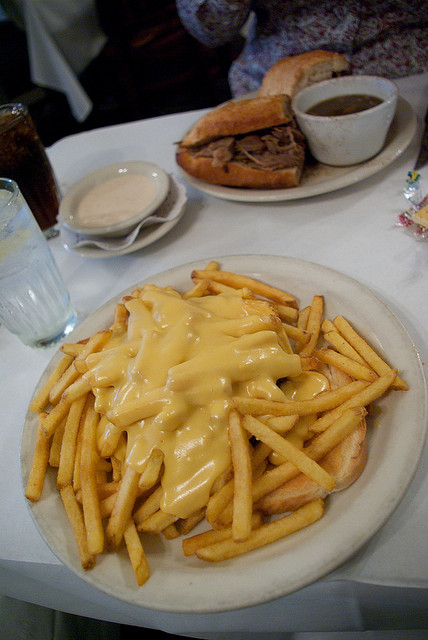

In [6]:
img = get_one_image()
image = Image.open(img)
display(image)

In [7]:
from transformers import AutoProcessor, LlavaForConditionalGeneration
from transformers import BitsAndBytesConfig
import torch

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)


model_id = "llava-hf/llava-1.5-7b-hf"

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained(model_id)
tokenizer = processor.tokenizer
model = LlavaForConditionalGeneration.from_pretrained(model_id, quantization_config=quantization_config, device_map="auto")

processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [8]:
print(model)

LlavaForConditionalGeneration(
  (vision_tower): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(577, 1024)
      )
      (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-23): 24 x CLIPEncoderLayer(
            (self_attn): CLIPSdpaAttention(
              (k_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
            )
            (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (a

In [9]:
print(model.config)

LlavaConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "llava-hf/llava-1.5-7b-hf",
  "architectures": [
    "LlavaForConditionalGeneration"
  ],
  "ignore_index": -100,
  "image_seq_length": 576,
  "image_token_index": 32000,
  "model_type": "llava",
  "multimodal_projector_bias": true,
  "pad_token_id": 32001,
  "projector_hidden_act": "gelu",
  "quantization_config": {
    "_load_in_4bit": true,
    "_load_in_8bit": false,
    "bnb_4bit_compute_dtype": "float16",
    "bnb_4bit_quant_storage": "uint8",
    "bnb_4bit_quant_type": "fp4",
    "bnb_4bit_use_double_quant": false,
    "llm_int8_enable_fp32_cpu_offload": false,
    "llm_int8_has_fp16_weight": false,
    "llm_int8_skip_modules": null,
    "llm_int8_threshold": 6.0,
    "load_in_4bit": true,
    "load_in_8bit": false,
    "quant_method": "bitsandbytes"
  },
  "text_config": {
    "_name_or_path": "lmsys/vicuna-7b-v1.5",
    "architectures": [
      "LlamaForCausalLM"
    ],
    "max_position_embeddings": 4096

In [10]:
print(type(model))

print(type(model.vision_tower.vision_model.encoder.layers))
print(model.vision_tower.vision_model.encoder.layers)

print("################################")
print(len(model.vision_tower.vision_model.encoder.layers))
print(model.vision_tower.vision_model.encoder.layers[0])

print("################################")
print(model.vision_tower.vision_model.encoder.layers[0].self_attn)

print("################################")
print(model.vision_tower.vision_model.encoder.layers[0].self_attn.k_proj)
print(type(model.vision_tower.vision_model.encoder.layers[0].self_attn.k_proj))

<class 'transformers.models.llava.modeling_llava.LlavaForConditionalGeneration'>
<class 'torch.nn.modules.container.ModuleList'>
ModuleList(
  (0-23): 24 x CLIPEncoderLayer(
    (self_attn): CLIPSdpaAttention(
      (k_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
      (v_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
      (q_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
      (out_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
    )
    (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (mlp): CLIPMLP(
      (activation_fn): QuickGELUActivation()
      (fc1): Linear4bit(in_features=1024, out_features=4096, bias=True)
      (fc2): Linear4bit(in_features=4096, out_features=1024, bias=True)
    )
    (layer_norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
)
################################
24
CLIPEncoderLayer(
  (self_attn): CLIPSdpaAttention(
    (k_proj): Linear4bit(

In [11]:
generate_config = {
    "max_new_tokens": 50,
    # "num_beams": 3,
    # "early_stopping": True,
    "do_sample": False,
    # "top_p": 0.3,
    "return_dict_in_generate": True,
    "output_attentions": True,
    "output_hidden_states": True,
     
}
print(generate_config)

{'max_new_tokens': 50, 'do_sample': False, 'return_dict_in_generate': True, 'output_attentions': True, 'output_hidden_states': True}


In [12]:

prompt = "USER: <image>\nWhat's the content of the image? ASSISTANT:"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)

input_kwags = {**inputs, **generate_config}

output = model.generate(**input_kwags)


`torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to eager attention. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [13]:
print(processor.batch_decode(output["sequences"], skip_special_tokens=True, clean_up_tokenization_spaces=False))

["USER:  \nWhat's the content of the image? ASSISTANT: The image features a plate of food, specifically a cheesy french fry dish, placed on a dining table. The plate is filled with cheese and fries, and there is a sandwich on the table as well."]


In [14]:
## num_layers: 32
## num_heads: 32
## data structure is [tokens, layers, batch_size, num_head, input_size, input_size]

print(type(output["attentions"]), len(output["attentions"]))
print(type(output["attentions"][0]), len(output["attentions"][0]))
print(output["attentions"][0][0].shape)

<class 'tuple'> 50
<class 'tuple'> 32
torch.Size([1, 32, 597, 597])


In [15]:
## data structure is [tokens, layers, batch_size, input_size, output_size]

print(type(output["hidden_states"]), len(output["hidden_states"]))
print(type(output["hidden_states"][0]), len(output["hidden_states"][0]))
print(output["hidden_states"][0][0].shape)

<class 'tuple'> 50
<class 'tuple'> 33
torch.Size([1, 597, 4096])


In [16]:
print(output["attentions"][0][0][0][0].shape)
print(output["attentions"][0][0][0][0].sum(dim=1))

torch.Size([597, 597])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1

In [17]:
# generate_config = {
#     "max_new_tokens": 50,
#     # "num_beams": 3,
#     # "early_stopping": True,
#     "do_sample": False,
#     # "top_p": 0.3,
#     "return_dict_in_generate": True,
#     "output_attentions": True,
#     "output_hidden_states": True,
# }

# def get_output(image, prompt="USER: <image>\n describe the image ASSISTANT: "):
#     inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)
#     input_kwags = {**inputs, **generate_config}
#     outputs = model.generate(**input_kwags)
#     return inputs, outputs

# def get_attention_scores(outputs, token_idx):
#     ## [new_tokens, layers, batch_size, num_head, input_size, input_size]
    
#     atten_weight = []
#     for layer in outputs["attentions"][token_idx]:
#         layer_attns = layer.squeeze(0)
#         atten_weight.append(layer_attns[:, -1, :].cpu())
        
#     return torch.stack(atten_weight)


In [18]:
class AttentionVisualizer:
    def __init__(self, **kwargs):
        self.image_token_id = 32000
        self.image_token_num = 576
        self.patch_size = 14
        self.processor = kwargs["processor"]
        self.tokenizer = kwargs["tokenizer"]
        self.prompt = kwargs["prompt"]
        self.generate_config = kwargs["generate_config"]

    def get_output(self, image, prompt=None, generate_config=None):
        if prompt is None:
            prompt = self.prompt
        if generate_config is None:
            generate_config = self.generate_config
        inputs = self.processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)
        input_kwags = {**inputs, **generate_config}
        outputs = model.generate(**input_kwags)
        return inputs, outputs

    def modified_token_idx_to_output_idx(self, modified_token_idx):
        return modified_token_idx + self.image_token_num - 1 - self.prompt_token_length

    def get_attention_scores(self, outputs, token_idx=-1):
        ## [new_tokens, layers, batch_size, num_head, input_size, input_size]
        atten_weight = []
        for layer in outputs["attentions"][token_idx]:
            layer_attns = layer.squeeze(0)
            atten_weight.append(layer_attns[:, -1, :].cpu())            
        return torch.stack(atten_weight)

    def decode_tokens(self, inputs, outputs):
        input_ids = inputs["input_ids"].cpu()
        output_ids = outputs["sequences"].cpu()

        generated_sequences = self.processor.batch_decode(outputs["sequences"], skip_special_tokens=True, clean_up_tokenization_spaces=False)
        print(generated_sequences)
    
        prompt_length = input_ids.shape[1]
        output_length = output_ids.shape[1]
        print(prompt_length, output_length)
        self.prompt_token_length = prompt_length
    
        output_ids_list = output_ids.squeeze().tolist()
        img_token_first_idx = output_ids_list.index(self.image_token_id)
    
        modified_output_token_ids = output_ids_list[0:img_token_first_idx] + [self.image_token_id] + output_ids_list[img_token_first_idx+self.image_token_num:]
        decode_tokens = self.tokenizer.convert_ids_to_tokens(modified_output_token_ids)
        return modified_output_token_ids, decode_tokens

    def aggregate_attention(self, atten_weights, agg, layer_lists=None):
        # atten_weights, [layers, heads, pre_tokens]
        # agg: aggregation level
        #     "individual":  no aggregation, return [layers, heads, pre_tokens]
        #     "layer": average over each layers return [layers, 1, pre_tokens]
        #     "multilayers": average over selected layers, require a layer_lists, average over given layers
        #         return [1, 1, pre_tokens]
        if agg == "individual":
            return atten_weights
        if agg == "layer":
            return atten_weights.mean(dim=1, keepdims=True)
        return atten_weights[layer_lists].mean(dim=1, keepdims=True).mean(dim=0, keepdims=True)

    def get_selected_token_idx(self, modified_token_list, input_token):
        matched_idx = [i for i, token in enumerate(modified_token_list) if token==input_token]
        return matched_idx
        
    def attention_maps(self, agg_atten, modified_token_ids):
        img_token_idx = modified_token_ids.index(self.image_token_id)

        text_atten = torch.cat([
            agg_atten[:,:,0:img_token_idx],
            torch.sum(agg_atten[:,:,img_token_idx:img_token_idx+self.image_token_num], dim=-1, keepdims=True),
            agg_atten[:,:,img_token_idx+self.image_token_num:]
        ], dim=-1)

        image_atten = agg_atten[:,:,img_token_idx:img_token_idx+self.image_token_num]
        return text_atten, image_atten

    

In [19]:
def plot_text_atten(text_atten, modified_token_list, layer=-1, head=-1):
    fig1, ax1 = plt.subplots(2,1, figsize=(25, 1))
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.02, hspace=0.5)

    plot_attention = text_atten[layer, head, :].cpu()
    plot_decode_tokens = modified_token_list[:text_atten.shape[-1]]
    
    ax1[0].scatter(range(len(plot_decode_tokens)),plot_attention, linewidth=5, marker='x', s=150, color='r')
    ax1[0].tick_params(axis='x', labelsize=20)
    ax1[0].tick_params(axis='y', labelsize=20)
    ax1[0].set_xticks(range(len(plot_decode_tokens)))
    ax1[0].set_xticklabels(plot_decode_tokens, rotation=75)
    ax1[0].set_title("Sum vision tokens with first token", fontsize=20)
    ax1[0].grid()
    
    ax1[1].scatter(range(len(plot_decode_tokens)-1),plot_attention[1:], linewidth=5, marker='x', s=150, color='r')
    ax1[1].tick_params(axis='x', labelsize=20)
    ax1[1].tick_params(axis='y', labelsize=20)
    ax1[1].set_xticks(range(len(plot_decode_tokens)-1))
    ax1[1].set_xticklabels(plot_decode_tokens[1:], rotation=75)
    ax1[1].set_title("Sum vision tokens without first token", fontsize=20)
    ax1[1].grid()


def plot_image_atten(image_atten, image):
    patch_size = 14
    image_input_size = 336
    patch_width, patch_height = image_input_size // patch_size, image_input_size // patch_size
    
    atten_heap = image_atten.reshape((-1, 1, 24, 24)).cpu()
    atten_heap = torch.nn.functional.interpolate(atten_heap, scale_factor=patch_size, mode="bilinear").numpy()

    fig2, ax2 = plt.subplots(1,1, figsize=(25, 10))
    ax2.imshow(atten_heap[0,0])
    # print(atten_heap.shape)

In [20]:
# image_atten_test = image_atten[-1,-1,:].reshape((1,1,-1))
# print(image_atten_test.shape)

# plot_image_atten(image_atten, image)

# print(image_atten_test[0,-1,:].reshape(-1,1, 24,24))

choose index 6705 from total 18783 images
/kaggle/input/mini-coco2014-dataset-for-image-captioning/Images/COCO_train2014_000000284960.jpg


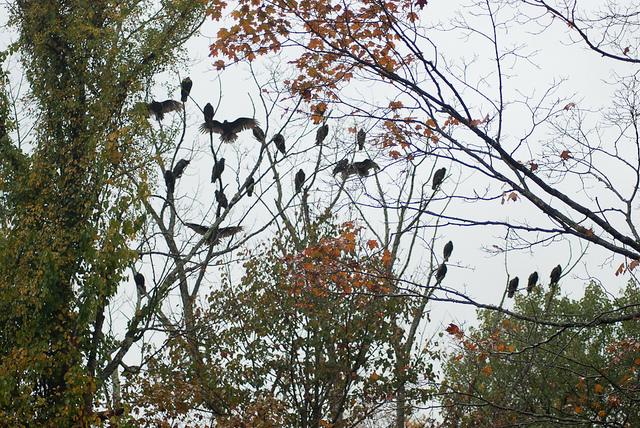

In [21]:
img = get_one_image()
image = Image.open(img)
display(image)

# inputs, outputs = get_output(image)

In [22]:
generate_config = {
    "max_new_tokens": 50,
    # "num_beams": 3,
    # "early_stopping": True,
    "do_sample": False,
    # "top_p": 0.3,
    "return_dict_in_generate": True,
    "output_attentions": True,
    "output_hidden_states": True,
}

vis_config = {
    "processor": processor,
    "tokenizer": tokenizer,
    "prompt": "USER: <image>\n describe the image ASSISTANT:",
    "generate_config": generate_config,
}

# print(vis_config)

In [23]:
vis = AttentionVisualizer(**vis_config)
inputs, outputs = vis.get_output(image)

modified_token_ids, modified_token_list = vis.decode_tokens(inputs, outputs)
print(len(modified_token_list))
print(modified_token_list)

['USER:  \n describe the image ASSISTANT: The image features a large group of birds perched on the branches of a tree. There are at least 13 birds visible in the scene, with some birds sitting closer to the top of the tree and others spread out across the branches. The']
591 641
66
['<s>', '▁US', 'ER', ':', '▁', '<image>', '▁', '<0x0A>', '▁describe', '▁the', '▁image', '▁A', 'SS', 'IST', 'ANT', ':', '▁The', '▁image', '▁features', '▁a', '▁large', '▁group', '▁of', '▁birds', '▁per', 'ched', '▁on', '▁the', '▁branches', '▁of', '▁a', '▁tree', '.', '▁There', '▁are', '▁at', '▁least', '▁', '1', '3', '▁birds', '▁visible', '▁in', '▁the', '▁scene', ',', '▁with', '▁some', '▁birds', '▁sitting', '▁closer', '▁to', '▁the', '▁top', '▁of', '▁the', '▁tree', '▁and', '▁others', '▁spread', '▁out', '▁across', '▁the', '▁branches', '.', '▁The']


In [24]:
# matched_token_id_list = vis.get_selected_token_idx(modified_token_list, "▁fire")
# print(matched_token_id_list)

# output_token_idx = vis.modified_token_idx_to_output_idx(matched_token_id_list[0])

# atten_weights = vis.get_attention_scores(outputs, token_idx=output_token_idx)
# print(atten_weights.shape)

# agg_atten = vis.aggregate_attention(atten_weights, agg="layer")
# print(agg_atten.shape)

# text_atten, image_atten = vis.attention_maps(agg_atten, modified_token_ids)
# print(text_atten.shape, image_atten.shape)

In [25]:
# for token_idx in matched_token_id_list:
#     output_token_idx = vis.modified_token_idx_to_output_idx(token_idx)
#     atten_weights = vis.get_attention_scores(outputs, token_idx=output_token_idx)
#     agg_atten = vis.aggregate_attention(atten_weights, agg="layer")
#     text_atten, image_atten = vis.attention_maps(agg_atten, modified_token_ids)

#     plot_text_atten(text_atten, modified_token_list)

In [26]:
# def evaluate_one_token(inputs, outputs, token_idx_list):
#     image_token_id = 32000
#     image_token_num = 576
#     input_ids = inputs["input_ids"].cpu()
#     output_ids = outputs["sequences"].cpu()

#     prompt_length = input_ids.shape[1]
#     output_length = output_ids.shape[1]
#     print(prompt_length, output_length)

#     output_ids_list = output_ids.squeeze().tolist()
#     img_token_first_idx = output_ids_list.index(image_token_id)

#     modified_output_token_ids = output_ids_list[0:img_token_first_idx] + [image_token_id] + output_ids_list[img_token_first_idx+image_token_num:]
#     decode_tokens = tokenizer.convert_ids_to_tokens(modified_output_token_ids)
#     print(decode_tokens)
    
#     for token_idx in token_idx_list:
#         # print(decode_tokens[:token_idx-image_token_num+1])
#         atten_weight = get_attention_scores(outputs, token_idx-prompt_length)
#         print(token_idx, atten_weight.shape)
#         total_attention = atten_weight[-1].mean(dim=0)
        
#         modified_attention = torch.cat([
#             total_attention[0:img_token_first_idx],
#             torch.sum(total_attention[img_token_first_idx:img_token_first_idx+image_token_num], dim=0, keepdim=True),
#             total_attention[img_token_first_idx+image_token_num:]
#         ]).tolist()

#         # print(len(modified_attention), token_idx-576)

#         fig1, ax1 = plt.subplots(2,1, figsize=(25, 10))
#         plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.02, hspace=0.5)
#         plot_decode_tokens = decode_tokens[:len(modified_attention)]
#         ax1[0].tick_params(axis='x', labelsize=16)
#         ax1[0].tick_params(axis='y', labelsize=16)
#         ax1[0].scatter(range(len(plot_decode_tokens)),modified_attention, linewidth=5, marker='x', s=150, color='r')
#         ax1[0].set_xticks(range(len(plot_decode_tokens)))
#         ax1[0].set_xticklabels(plot_decode_tokens, rotation=75)
#         ax1[0].set_title("Sum vision tokens with first token", fontsize=20)
#         ax1[0].grid()
    
#         ax1[1].tick_params(axis='x', labelsize=16)
#         ax1[1].tick_params(axis='y', labelsize=16)
#         ax1[1].scatter(range(len(plot_decode_tokens[1:])),modified_attention[1:], linewidth=5, marker='x', s=150, color='r')
#         ax1[1].set_xticks(range(len(plot_decode_tokens)-1))
#         ax1[1].set_xticklabels(plot_decode_tokens[1:], rotation=75)
#         ax1[1].set_title("Sum vision tokens without first token", fontsize=20)
#         ax1[1].grid()
        

In [27]:
# def heatmap_over_image(image, atten_weights):
#     image_input_size = 336
#     patch_size = 14
#     resized_image = np.array(image.resize((image_input_size, image_input_size)))
    
#     mask_data = atten_weights.reshape((1,1,24,24)).cpu()
#     mask_data = torch.nn.functional.interpolate(mask_data, scale_factor=14, mode='bilinear', align_corners=False) 
#     mask_data = mask_data.squeeze()

#     heatmap = (mask_data-mask_data.min())/(mask_data.max()-mask_data.min())
#     # overlay = np.float32(heatmap) + np.float32(resized_image)
#     # overlay = overlay / np.max(cam)
#     heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_HSV)
#     hm = np.float32(heatmap)
#     cam = hm + np.float32(resized_image)
#     cam = cam / np.max(cam)
#     # return np.uint8(255 * cam)
    


In [28]:
# def show_image_weights(image, inputs, outputs, token_idx_list):
#     image_token_id = 32000
#     image_token_num = 576
#     image_input_size = 336
#     patch_size = 14
#     input_ids = inputs["input_ids"].cpu()
#     output_ids = outputs["sequences"].cpu()

#     prompt_length = input_ids.shape[1]
#     output_length = output_ids.shape[1]

#     output_ids_list = output_ids.squeeze().tolist()
#     img_token_first_idx = output_ids_list.index(image_token_id)

#     # modified_output_token_ids = output_ids_list[img_token_first_idx:img_token_first_idx+image_token_num]
#     # decode_tokens = tokenizer.convert_ids_to_tokens(modified_output_token_ids)
#     # # print(len(decode_tokens),decode_tokens)

#     fig1, ax1 = plt.subplots(1, len(token_idx_list), figsize=(20, 8))
    
#     for i, token_idx in enumerate(token_idx_list):
        
#         atten_weight = get_attention_scores(outputs, token_idx-prompt_length)
#         total_attention = atten_weight[-1].mean(dim=0)
#         modified_attention = total_attention[img_token_first_idx:img_token_first_idx+image_token_num]

#         heatmap = heatmap_over_image(image, modified_attention)

#         if (len(token_idx_list) == 1):
#             ax1.imshow(heatmap)
#             ax1.set_axis_off()
#         else:
#             ax1[i].imshow(heatmap)
#             ax1[i].set_axis_off()
        
        

In [29]:
# show_image_weights(image, inputs, outputs, matched_idx)

In [30]:
# ## [tokens, layers, batch_size, num_head, input_size, input_size]

# print(inputs["input_ids"].shape)
# print(outputs["sequences"].shape)
# print(outputs["attentions"][-1][0].shape)
# print(processor.batch_decode(outputs["sequences"], skip_special_tokens=True, clean_up_tokenization_spaces=False))